In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Partie 1

## Fonctions dont vous pouvez avoir besoin 

## Chaîne de Markov 

On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui sert à terminer les mots.

La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1 correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de mot. Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de dictionnaire en python pour faire cette correspondance.

On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de l’alphabet.


In [2]:
dic={1 : ' ', 
     2 : 'a', 
     3 : 'b', 
     4 : 'c', 
     5 : 'd', 
     6 : 'e', 
     7 : 'f', 
     8 : 'g', 
     9 : 'h', 
     10 : 'i', 
     11 : 'j', 
     12 : 'k', 
     13 : 'l', 
     14 : 'm', 
     15 : 'n', 
     16 : 'o', 
     17 : 'p', 
     18 : 'q', 
     19 : 'r' , 
     20 : 's', 
     21 : 't', 
     22 : 'u', 
     23 : 'v', 
     24 : 'w', 
     25 : 'x' , 
     26 : 'y', 
     27 : 'z', 
     28 : ' ' }

In [3]:
dic_inv = {v: k for k, v in dic.items()}

###  Matrice de transitions

'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.

In [4]:
bigramenglish = np.loadtxt('./bigramenglish.txt')

A quelles probabilités correspond la première ligne de la matrice de transition ?

In [5]:
print('Réponse: \n\nLa première ligne de la matrice de transition est : \n\n%s'% bigramenglish[0,:], 
      '\n\nLa somme des probabilités est: %s'%sum(bigramenglish[0,:]),
      ", qui est environ égale à 1.\n\nLes probabilités de la première ligne correspondent aux probabilités de transition depuis le premier élément qui est l'espace initial vers les autres éléments dans le dictionnaire.")

Réponse: 

La première ligne de la matrice de transition est : 

[0.0000000e+00 1.1268720e-01 4.3608943e-02 4.5454545e-02 3.2904451e-02
 2.2094495e-02 4.1763341e-02 1.5555790e-02 6.4437882e-02 6.8920059e-02
 3.6384729e-03 4.2185193e-03 2.3465514e-02 3.9759544e-02 2.2832736e-02
 7.0343809e-02 3.1058848e-02 1.4237503e-03 2.5680236e-02 6.6916262e-02
 1.6452225e-01 1.0388104e-02 7.0660198e-03 7.0502004e-02 1.0546298e-04
 1.0599030e-02 5.2731491e-05 0.0000000e+00] 

La somme des probabilités est: 0.9999999997710001 , qui est environ égale à 1.

Les probabilités de la première ligne correspondent aux probabilités de transition depuis le premier élément qui est l'espace initial vers les autres éléments dans le dictionnaire.


Et celles de la dernière colonne ?

In [6]:
print('Réponse: \n\nLa dernière colonne de la matrice de transition est :\n\n%s'%bigramenglish[:,-1], 
      "\n\nLes probabilités de la dernière colonne correspondent aux probabilités de transition depuis tous les états vers le dernier états qui est l'espace final.")

Réponse: 

La dernière colonne de la matrice de transition est :

[0.0000000e+00 6.7478169e-02 7.1084433e-03 1.9535224e-02 5.9884373e-01
 3.6047379e-01 3.9653963e-01 3.1566736e-01 1.0300926e-01 2.4606608e-02
 9.5877277e-04 3.7225637e-01 1.5338255e-01 1.5795761e-01 2.9421872e-01
 1.2308174e-01 6.4222084e-02 1.3966480e-03 2.1088912e-01 4.3030156e-01
 2.2273059e-01 3.8466582e-02 9.9108028e-05 1.0216281e-01 1.2345679e-01
 7.7582944e-01 1.9193858e-03 1.0000000e+00] 

Les probabilités de la dernière colonne correspondent aux probabilités de transition depuis tous les états vers le dernier états qui est l'espace final.


Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [7]:
print("La transition la plus fréquente depuis chaque lettre de l'alphabet est:")
for i in range(0,len(dic)):
    print(dic[i+1], "=>", dic[np.argmax(bigramenglish[i,:])+1])

La transition la plus fréquente depuis chaque lettre de l'alphabet est:
  => t
a => n
b => e
c => o
d =>  
e =>  
f =>  
g =>  
h => e
i => n
j => o
k =>  
l => e
m => e
n =>  
o => n
p => e
q => u
r => e
s =>  
t => h
u => r
v => e
w => a
x => t
y =>  
z => e
  =>  


###  Générer un mot

On veut générer un mot à partir de l’état initial 1 (espace de début de mot).

Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.

In [8]:
def etat_suivant(bi_gram, etat_courant): #etat_courant is between 0 and 27
    unif = np.random.random()
    cs = np.cumsum(bi_gram[etat_courant]) 
    etat = 0 
    while unif > cs[etat]:
        etat = etat + 1
    return etat

In [9]:
etat_suivant(bigramenglish, 0)

12

Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.

Réponse:

La fonction de répartition aide à trouver l'état dont la probabilité accumulée qui est supérieure à la valeur choisie aléatoirement entre 0 et 1. Cet état trouvé est le prochain état.


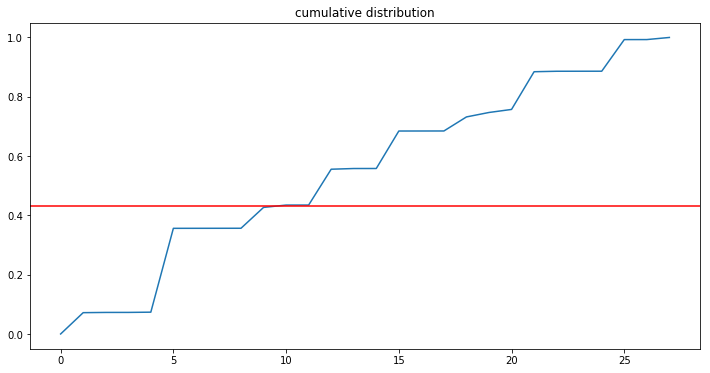

In [10]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(bigramenglish[2]))
plt.title("cumulative distribution")
plt.axhline(np.random.random(), c='red')

print("Réponse:\n\nLa fonction de répartition aide à trouver l'état dont la probabilité accumulée qui est supérieure à la valeur choisie aléatoirement entre 0 et 1. Cet état trouvé est le prochain état.")

Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28). Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire. 

In [11]:
#display_seq transforms states into caractors 
def display_seq(seq, dic):
    word = []
    word.append([dic[i+1] for i in seq])
    return ''.join(word[0]) 

#genere_state_seq generates sequence of states
def genere_state_seq(dic, bi_gram, etat, final) :
    bi_gram = bi_gram
    seq = []
    etat = etat
    while etat != final :
        etat = etat_suivant(bi_gram, etat)
        seq.append(etat)
    return display_seq(seq, dic)

In [12]:
genere_state_seq(dic, bigramenglish, 0, 27)

'ory '

Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

In [13]:
for i in range (20):
    print(genere_state_seq(dic, bigramenglish, 0, 27))

manls 
aren 
ent 
n 
te 
asit 
tid 
d 
toming 
aciead 
un 
f 
boulangr 
toanot 
wis 
e 
hingerivakerer 
mere 
me 
moun 


### Générer une phrase 

On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. 

In [14]:
def modifie_mat_dic(bi_gram):
    dic_new = dic.copy()
    dic_new[29] = '.'
    
    bigram_new = np.zeros((29, 29))
    bigram_new[:28,:28] = bi_gram
    bigram_new[27,27] = 0
    bigram_new[27,0] = 0.9
    bigram_new[27,28] = 0.1
    bigram_new[28,28] = 1
    return dic_new, bigram_new

In [15]:
dic_new, bigramenglish_new = modifie_mat_dic(bigramenglish)

Donner des exemples de phrases générées.

In [16]:
genere_state_seq(dic_new, bigramenglish_new, 0, 28)

'che  wanqurs  whe  ssco  muthe  re  o  me  awesoy  lloury  texcortt  thepin  satsthe  wit  tardan  d .'

### Reconnaissance de la langue

Charger la matrice des transitions entre caractères pour le français. 

In [17]:
bigramfrancais = np.loadtxt('./bigramfrancais.txt')

Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , + et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.

In [18]:
def calc_vraisemblance(sentence, bi_gram, dic):
    line = 0
    p_total = 1
    for i in range(len(sentence)):
        j = 1        
        while dic[j] != sentence[i] or bi_gram[line][j-1] == 0:
            j += 1
            if j == 29:
                break
        
        if j >= 28:
            p = p * bi_gram[27,0]
            line = 0
        else: 
            p = bi_gram[line][j-1]   
            line = j-1
            p_total = p_total * p
    return p_total

In [19]:
def calc_vraisemblance(sentence, bi_gram, dic_inv):
    line = 0
    p_total = 1
    for i in range(1,len(sentence)):
        j = dic_inv_new[sentence[i]]
        p = bi_gram[line][j-1]
        p_total = p_total * p
        line = j-1
    return p_total

Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ». De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».

In [20]:
dic_new, bigramfrancais_new = modifie_mat_dic(bigramfrancais)

dic_new[1] = '-'
dic_new[28] = '+'
dic_inv_new = {v: k for k, v in dic_new.items()}

In [21]:
print('Pour la phrase "to be or not to be":\n\nla vraisemblance de la modèle français est %s.\n\nla vraisemblance de la modèle anglais est %s.'
      %(calc_vraisemblance('-to+-be+-or+-not+-to+-be+.', bigramfrancais_new, dic_new), calc_vraisemblance('-to+-be+-or+-not+-to+-be+.', bigramenglish_new, dic_new)))

Pour la phrase "to be or not to be":

la vraisemblance de la modèle français est 5.9602081018686406e-30.

la vraisemblance de la modèle anglais est 8.112892227809415e-20.


In [22]:
print('Pour la phrase "etre ou ne pas etre":\n\nla vraisemblance de la modèle français est %s.\n\nla vraisemblance de la modèle anglais est %s.'
      %(calc_vraisemblance('-etre+-ou+-ne+-pas+-etre+.', bigramfrancais_new, dic_new), calc_vraisemblance('-etre+-ou+-ne+-pas+-etre+.', bigramenglish_new, dic_new)))

Pour la phrase "etre ou ne pas etre":

la vraisemblance de la modèle français est 1.145706887234789e-19.

la vraisemblance de la modèle anglais est 4.462288711775253e-24.


# Partie 2

## Introduction 

## Génération de séquences d’observations 

Les matrices A0.txt, B0.txt, vect_p0.txt contiennent les matrices A, B, et le vecteur π correspondant au modèle de Markov caché du chiffre 0. Le fichier matrice_symboles.txt contient le dictionnaire. Charger ces fichiers depuis le site pédagogique.

In [23]:
A0 = np.loadtxt('./data_txt_compact/A0.txt')
B0 = np.loadtxt('./data_txt_compact/B0.txt')
vect_p0 = np.loadtxt('./data_txt_compact/vect_pi0.txt')
matrice_symboles = np.loadtxt('./data_txt_compact/matrice_symboles.txt')

### A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur π? 

Réponse: 

- Les zéros sur (i,j) de la matrice B représentent que la probabilité depuis un état caché i à un état j est 0.
- Les zéros sur (i,j) de la matrice A représentent que la probabilité de transition entre état i et etat j est 0.
- Les zéros sur [j] du vecteur π représentent que la probabilité de l'état j sur l'état initial est 0.

### etat_suivant

Ecrire une fonction etat_suivant qui génère un état qt+1(à t+1) à partir de l’état courant qt (à t) à l’aide de la matrice de transitions et de la fonction de répartition cumsum.

In [24]:
def etat_suivant(bi_gram, etat_initial):
    unif = np.random.random()
    cs = np.cumsum(bi_gram[etat_initial])
    etat = 0
    while unif > cs[etat]:
        etat = etat + 1
    return etat

In [25]:
etat_suivant(A0, 0)

0

Afficher la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.

La fonction de répartition aide à trouver l'état dont la probabilité accumulée qui est supérieure à la valeur choisie aléatoirement entre 0 et 1. Cet état trouvé sera le prochain état.


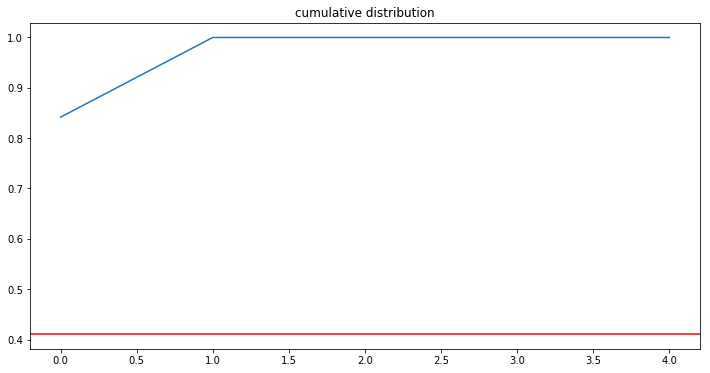

In [26]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(A0[0]))
plt.title("cumulative distribution")
plt.axhline(np.random.random(), c='red')

print("La fonction de répartition aide à trouver l'état dont la probabilité accumulée qui est supérieure à la valeur choisie aléatoirement entre 0 et 1. Cet état trouvé sera le prochain état.")

### Séquence d'observations 

Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0. On commencera par générer une séquence d’états suivant ce modèle à l’aide de la fonction etat_suivant. Puis on générera la séquence d’observations par le même procédé.

In [27]:
#generate sequence of states
def genere_etat_seq(transition_etat, etat, number) :
    transition_etat = transition_etat
    seq_etat = []
    etat = etat
    seq_etat.append(etat)
    for i in range(number) :
        etat_prochain = etat_suivant(transition_etat, etat)
        seq_etat.append(etat_prochain)
        etat = etat_prochain
    return seq_etat

#generate sequence of observations
def genere_obs_seq(transition_obs, transition_etat, etat, number):
    seq_obs = []
    unif = np.random.random()
    for i in genere_etat_seq(transition_etat, etat, number):
        unif = np.random.random()
        cs = np.cumsum(transition_obs[:,i])
        obs = 1
        while unif > cs[obs]:
            obs = obs + 1
        seq_obs.append(obs)
    return seq_obs

In [28]:
ob0 = genere_obs_seq(B0, A0, 0, 28)

In [29]:
ob0

[1,
 13,
 29,
 17,
 11,
 11,
 17,
 22,
 22,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### Visualiser 

Visualiser le résultat sous forme d’image. Générer des séquences pour le chiffre 7 et le chiffre 1 (matrices B1.txt, B7.txt, etc...)

In [30]:
#import data
A1 = np.loadtxt('./data_txt_compact/A1.txt')
B1 = np.loadtxt('./data_txt_compact/B1.txt')
vect_p1 = np.loadtxt('./data_txt_compact/vect_pi1.txt')

A7 = np.loadtxt('./data_txt_compact/A7.txt')
B7 = np.loadtxt('./data_txt_compact/B7.txt')
vect_p7 = np.loadtxt('./data_txt_compact/vect_pi7.txt')

In [31]:
#generate sequence of observation for class 1 and 7
ob0 = genere_obs_seq(B0, A0, 0, 28)
ob1 = genere_obs_seq(B1, A1, 0, 28)
ob7 = genere_obs_seq(B7, A7, 0, 28)

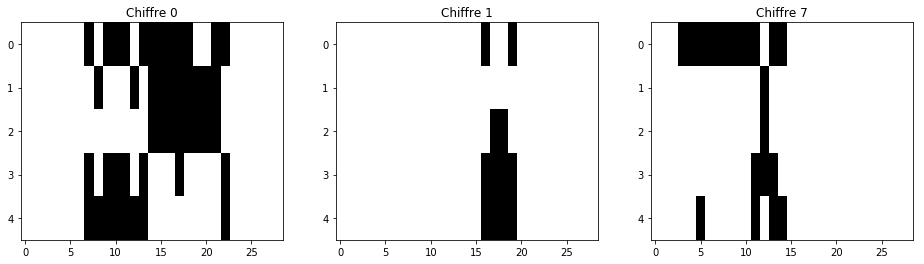

In [32]:
#visualise the sequence
fig=plt.figure(figsize=(16, 4))

im=[]
for t in range (0,len(ob0)) :
    im_col=matrice_symboles[:, ob0[t]-1]
    im.append(im_col)
im = np.array(im).T # now make an array
fig.add_subplot(1, 3, 1)
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
plt.title('Chiffre 0')

im=[]
for t in range (0,len(ob1)) :
    im_col=matrice_symboles[:, ob1[t]-1] 
    im.append(im_col)
im = np.array(im).T # now make an array
fig.add_subplot(1, 3, 2)
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
plt.title('Chiffre 1')

im=[]
for t in range (0,len(ob7)) :
    im_col=matrice_symboles[:, ob7[t]-1] 
    im.append(im_col)
im = np.array(im).T # now make an array
fig.add_subplot(1, 3, 3)
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
plt.title('Chiffre 7')

plt.show()

## Calcul de la vraisemblance de séquences d’observations
 


Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne. Le script suivant extrait la 5ème observation de la 3ème séquence des chiffres 0.

### Calculer la vraisemblance 

Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par l’algorithme de Viterbi (on pourra implémenter la version logarithmique de cet algorithme). Pour cela les matrices A, B et π seront converties en logarithmes (utiliser np.log).

In [33]:
TestChiffres0 = np.loadtxt('./data_txt_compact/SeqTest0.txt')
TestChiffres1 = np.loadtxt('./data_txt_compact/SeqTest1.txt')
TestChiffres7 = np.loadtxt('./data_txt_compact/SeqTest7.txt')

Commentaire: 

Avant calculer la vraisemblance de ces séquence, on va voir comment les séquences d'observations ressemble en image. On va moyenner tous les séquences d'observations et les intégrir en une image. 

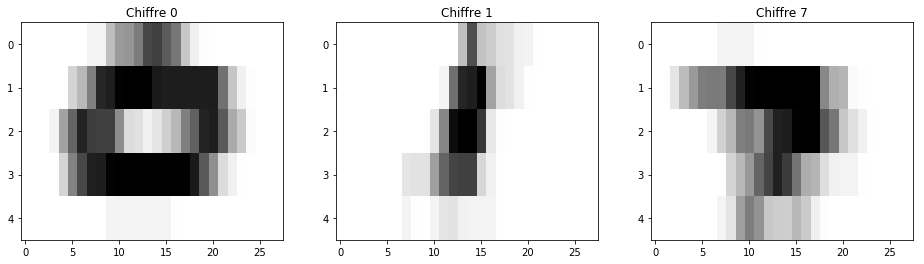

In [34]:
#visualize the images
fig=plt.figure(figsize=(16, 4))

im = []
for t in range(0, TestChiffres0.shape[1]):
    for i in range(0, TestChiffres0.shape[0]):
        im_col+=matrice_symboles[:,int(TestChiffres0[i, t])-1]
    im_col = im_col/TestChiffres0.shape[0]
    im.append(im_col)
im = np.array(im).T # now make an array
fig.add_subplot(1,3,1)
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
plt.title('Chiffre 0')

im = []
for t in range(0, TestChiffres1.shape[1]):
    for i in range(0, TestChiffres1.shape[0]):
        im_col+=matrice_symboles[:,int(TestChiffres1[i, t])-1]
    im_col = im_col/TestChiffres1.shape[0]
    im.append(im_col)
im = np.array(im).T # now make an array
fig.add_subplot(1,3,2)
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
plt.title('Chiffre 1')

im = []
for t in range(0, TestChiffres7.shape[1]):
    for i in range(0, TestChiffres7.shape[0]):
        im_col+=matrice_symboles[:,int(TestChiffres7[i, t])-1]
    im_col = im_col/TestChiffres7.shape[0]
    im.append(im_col)
im = np.array(im).T # now make an array
fig.add_subplot(1,3,3)
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
plt.title('Chiffre 7')

plt.show()

Les images se distinguent bien entre eux. Maintenant on va voir les vraisemblances des modèles de 0, 1 et 7. 

In [35]:
#change into log
def log(mat):
    matrix=mat.copy()
    ex, fe = matrix.shape
    for i in range(ex):
        for j in range(fe):
            if matrix[i][j] == 0:
                matrix[i][j] = -1000
            else: 
                matrix[i][j] = np.log(matrix[i][j])
    return matrix

def viterbi_vraisemblance_log(test, n, A, B, pi):
    #test is the test data
    #n is the indice of sequence in the test data
    unif = np.random.random()
    delta = np.zeros((len(A), test.shape[1]))
    
    #calculate first status of delta with initial pi value
    delta[:,0] = pi[:] + B0[int(test[n,0])-1,:]
    #iterate observations per sequence
    for i in range(1, test.shape[1]): #28
        for s in range(len(A)):#5
            delta[s,i] = np.max(delta[:,i-1] + A[:,s]) + B[int(test[n,i])-1,s]
            #phi[s,i] = np.argmax(delta[:,i-1]*A[:,s])
    proba = np.max(delta[:,-1])     

    return 10**proba

In [36]:
A0_log = log(A0)
B0_log = log(B0)
vect_p0_log = log(vect_p0.reshape(1,-1))[0]
print('Pour la modèle 0:')
for n in range(TestChiffres0.shape[0]):
    print('La vraisemblance pour la séquence %s est %s.'%(n+1,viterbi_vraisemblance_log(TestChiffres0, n, A0_log, B0_log, vect_p0_log)))

Pour la modèle 0:
La vraisemblance pour la séquence 1 est 6.188327573735087e-29.
La vraisemblance pour la séquence 2 est 2.0780215062589775e-32.
La vraisemblance pour la séquence 3 est 3.993004389558117e-38.
La vraisemblance pour la séquence 4 est 6.815964439502935e-32.
La vraisemblance pour la séquence 5 est 2.8372170780473504e-48.
La vraisemblance pour la séquence 6 est 6.478860385380666e-32.
La vraisemblance pour la séquence 7 est 5.275433549342219e-35.
La vraisemblance pour la séquence 8 est 2.6576559521983894e-25.
La vraisemblance pour la séquence 9 est 4.1327808262024106e-42.
La vraisemblance pour la séquence 10 est 1.4586854043990447e-21.


In [37]:
A1_log = log(A1)
B1_log = log(B1)
vect_p1_log = log(vect_p1.reshape(1,-1))[0]
print('Pour la modèle 1:')
for n in range(TestChiffres1.shape[0]):
    print('La vraisemblance pour la séquence %s est %s.'%(n+1,viterbi_vraisemblance_log(TestChiffres1, n, A1_log, B1_log, vect_p1_log)))

Pour la modèle 1:
La vraisemblance pour la séquence 1 est 4.717653066894401e-53.
La vraisemblance pour la séquence 2 est 6.487768273339745e-13.
La vraisemblance pour la séquence 3 est 4.60004678697586e-23.
La vraisemblance pour la séquence 4 est 2.5177347274677913e-13.
La vraisemblance pour la séquence 5 est 1.911354674216564e-13.
La vraisemblance pour la séquence 6 est 6.712739973787396e-44.
La vraisemblance pour la séquence 7 est 3.554956598210941e-29.
La vraisemblance pour la séquence 8 est 9.275455661914314e-32.
La vraisemblance pour la séquence 9 est 1.23450349164521e-18.
La vraisemblance pour la séquence 10 est 1.4707540760505446e-10.


In [38]:
A7_log = log(A7)
B7_log = log(B7)
vect_p7_log = log(vect_p7.reshape(1,-1))[0]
print('Pour la modèle 7:')
for n in range(TestChiffres7.shape[0]):
    print('La vraisemblance pour la séquence %s est %s.'%(n+1,viterbi_vraisemblance_log(TestChiffres7, n, A7_log, B7_log, vect_p7_log)))

Pour la modèle 7:
La vraisemblance pour la séquence 1 est 2.7630402027837616e-32.
La vraisemblance pour la séquence 2 est 3.820645109461345e-31.
La vraisemblance pour la séquence 3 est 5.533100575559308e-48.
La vraisemblance pour la séquence 4 est 2.766698605951445e-42.
La vraisemblance pour la séquence 5 est 8.4087327481843e-24.
La vraisemblance pour la séquence 6 est 3.401813152756036e-29.
La vraisemblance pour la séquence 7 est 1.4925387874862496e-20.
La vraisemblance pour la séquence 8 est 1.3923008910593357e-46.
La vraisemblance pour la séquence 9 est 2.924596498871453e-31.
La vraisemblance pour la séquence 10 est 2.836106263070274e-25.


### Classification des images 

Donner le résultat de la classification des images de test en considérant un problème à trois classes : 0, 1 et 7.

In [39]:
def classification(test, A0_log, B0_log, vect_p0_log, A1_log, B1_log, vect_p1_log, A7_log, B7_log, vect_p7_log):
    ind = [0,1,7]
    fig=plt.figure(figsize=(12, 4))
    for n in range(test.shape[0]):
        #visualise the images
        im = []
        for t in range(0, test.shape[1]):
            im_col=matrice_symboles[:,int(test[n, t])-1]
            im.append(im_col)
        im = np.array(im).T # now make an array
        fig.add_subplot(2, 5, n+1)
        plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
        #calculate the proba vraisemblance
        c0 = viterbi_vraisemblance_log(test, n, A0_log, B0_log, vect_p0_log)
        c1 = viterbi_vraisemblance_log(test, n, A1_log, B1_log, vect_p1_log)
        c7 = viterbi_vraisemblance_log(test, n, A7_log, B7_log, vect_p7_log)
        c = ind[np.argmax([c0, c1, c7])]
        print('La classification pour la séquence %s est %s.\nLa vraisemblance des classes 0, 1 et 7: %s, %s, %s.\n'%(n,c, c0, c1, c7))

Pour la modèle 0:

La classification pour la séquence 0 est 0.
La vraisemblance des classes 0, 1 et 7: 6.188327573735087e-29, 9.748426683309532e-93, 6.529168854803648e-106.

La classification pour la séquence 1 est 0.
La vraisemblance des classes 0, 1 et 7: 2.0780215062589775e-32, 3.922281983918701e-90, 3.479763863050684e-89.

La classification pour la séquence 2 est 0.
La vraisemblance des classes 0, 1 et 7: 3.993004389558117e-38, 1.6974901969785622e-61, 9.936699577742638e-48.

La classification pour la séquence 3 est 0.
La vraisemblance des classes 0, 1 et 7: 6.815964439502935e-32, 6.251598223013799e-118, 2.2959118314203407e-114.

La classification pour la séquence 4 est 0.
La vraisemblance des classes 0, 1 et 7: 2.8372170780473504e-48, 8.973066665610402e-75, 1.9421276994576714e-108.

La classification pour la séquence 5 est 0.
La vraisemblance des classes 0, 1 et 7: 6.478860385380666e-32, 3.726509805957796e-80, 3.8355017683493945e-103.

La classification pour la séquence 6 est 0.
La

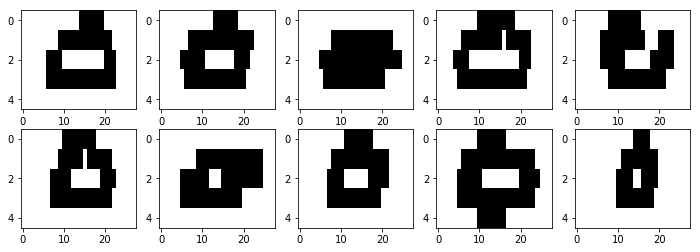

In [40]:
print('Pour la modèle 0:\n')
classification(TestChiffres0, A0_log, B0_log, vect_p0_log, A1_log, B1_log, vect_p1_log, A7_log, B7_log, vect_p7_log)

Pour la modèle 1:

La classification pour la séquence 0 est 1.
La vraisemblance des classes 0, 1 et 7: 6.766780106566167e-70, 4.717653066894401e-53, 3.0009128880220986e-72.

La classification pour la séquence 1 est 1.
La vraisemblance des classes 0, 1 et 7: 8.87667514517009e-20, 6.487768273339745e-13, 3.6347745284791494e-28.

La classification pour la séquence 2 est 1.
La vraisemblance des classes 0, 1 et 7: 8.747955218616978e-31, 4.60004678697586e-23, 6.505957549409308e-39.

La classification pour la séquence 3 est 1.
La vraisemblance des classes 0, 1 et 7: 7.954082269587863e-18, 2.5177347274677913e-13, 2.2980602695590464e-34.

La classification pour la séquence 4 est 1.
La vraisemblance des classes 0, 1 et 7: 9.682815979159835e-25, 1.911354674216564e-13, 1.2424564031381806e-34.

La classification pour la séquence 5 est 1.
La vraisemblance des classes 0, 1 et 7: 9.696188487150993e-67, 6.712739973787396e-44, 1.1884232360524318e-62.

La classification pour la séquence 6 est 1.
La vraise

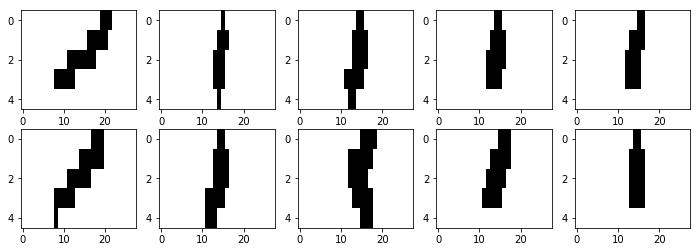

In [41]:
print('Pour la modèle 1:\n')
classification(TestChiffres1, A0_log, B0_log, vect_p0_log, A1_log, B1_log, vect_p1_log, A7_log, B7_log, vect_p7_log)

Pour la modèle 7:

La classification pour la séquence 0 est 7.
La vraisemblance des classes 0, 1 et 7: 5.846907724151573e-88, 2.748321507412194e-81, 2.7630402027837616e-32.

La classification pour la séquence 1 est 7.
La vraisemblance des classes 0, 1 et 7: 9.965991825571101e-54, 1.3315469009164933e-56, 3.820645109461345e-31.

La classification pour la séquence 2 est 1.
La vraisemblance des classes 0, 1 et 7: 2.0689179139455086e-59, 1.2411753785801129e-42, 5.533100575559308e-48.

La classification pour la séquence 3 est 7.
La vraisemblance des classes 0, 1 et 7: 2.1623423878178575e-69, 5.745232717942654e-73, 2.766698605951445e-42.

La classification pour la séquence 4 est 7.
La vraisemblance des classes 0, 1 et 7: 1.6913002068543504e-89, 1.9752856819515147e-57, 8.4087327481843e-24.

La classification pour la séquence 5 est 7.
La vraisemblance des classes 0, 1 et 7: 1.8859246890562948e-36, 3.483481008890169e-57, 3.401813152756036e-29.

La classification pour la séquence 6 est 7.
La vrai

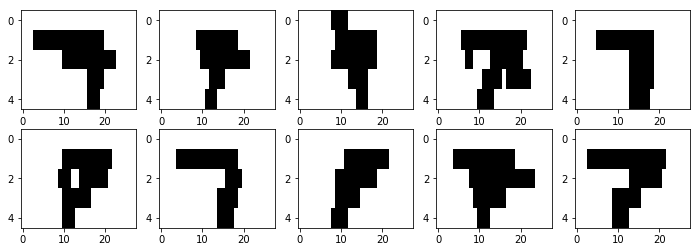

In [42]:
print('Pour la modèle 7:\n')
classification(TestChiffres7, A0_log, B0_log, vect_p0_log, A1_log, B1_log, vect_p1_log, A7_log, B7_log, vect_p7_log)